In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
pd.set_option('display.max_columns', None)

In [20]:
# Load employee_survey.csv
df = pd.read_csv("..\\employee_survey.csv")
df = df.dropna()

df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.5,2,1,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.8,2,2,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.1,5,4,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.9,3,1,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,3.7,2,1,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


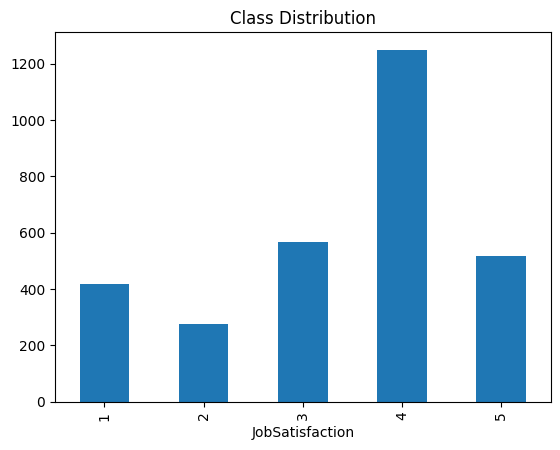

In [7]:
# Check class distribution
df['JobSatisfaction'].value_counts().sort_index().plot(kind='bar', title='Class Distribution')
plt.show()

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("..\\employee_survey.csv")
df = df.dropna()

# One-hot encode categorical variables
df = pd.get_dummies(df)

# Feature selection (all columns except the target JobSatisfaction)
X = df.drop(columns=["JobSatisfaction", "EmpID"])
y = df['JobSatisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [24],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train the model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy: {accuracy}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}
Best cross-validation accuracy: 0.4322314049586777
Test set accuracy: 0.44297520661157025
